In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import skimage as ski
import sklearn as skl
import os
from glob import glob
from pathlib import Path

# 1. Train/test split

In [59]:
dataset = Path("Y:/kau/диплом/data/dataset")
# /chunks.npy
# /labels.npy
# /lbp_R_P_x.npy
# /hist_R_P_x.npy

In [61]:
all_labels = np.load(f"{dataset}/labels.npy")
print(f"Total {all_chunks.shape[0]} labels")

Total 1950 labels


In [97]:
feature_files = list(dataset.glob("hist_*.npy"))
feature_nps = [np.load(f) for f in feature_files]
feature_names = []
for ff,fnpy in zip(feature_files,feature_nps):
    feature_names += [f"{ff.stem}[{i}]" for i in range(fnpy.shape[1])]
feature_names[250:265], len(feature_names)

(['hist_R1_P8_d[250]',
  'hist_R1_P8_d[251]',
  'hist_R1_P8_d[252]',
  'hist_R1_P8_d[253]',
  'hist_R1_P8_d[254]',
  'hist_R1_P8_d[255]',
  'hist_R1_P8_u[0]',
  'hist_R1_P8_u[1]',
  'hist_R1_P8_u[2]',
  'hist_R1_P8_u[3]',
  'hist_R1_P8_u[4]',
  'hist_R1_P8_u[5]',
  'hist_R1_P8_u[6]',
  'hist_R1_P8_u[7]',
  'hist_R1_P8_u[8]'],
 4440)

In [98]:
all_features = np.concat(feature_nps, axis=1)
assert all_features.shape[0] == all_labels.shape[0]
assert all_features.shape[1] == len(feature_names)
all_features.shape

(1950, 4440)

In [99]:
df = pd.DataFrame(all_features, columns=feature_names)
df['label'] = all_labels[:,1]
df['label_subset'] = all_labels[:,0]
df

,hist_R1_P8_d[0],hist_R1_P8_d[1],hist_R1_P8_d[2],hist_R1_P8_d[3],hist_R1_P8_d[4],hist_R1_P8_d[5],hist_R1_P8_d[6],hist_R1_P8_d[7],hist_R1_P8_d[8],hist_R1_P8_d[9],...,hist_R5_P36_u[30],hist_R5_P36_u[31],hist_R5_P36_u[32],hist_R5_P36_u[33],hist_R5_P36_u[34],hist_R5_P36_u[35],hist_R5_P36_u[36],hist_R5_P36_u[37],label,label_subset
0,829,132,24,87,401,35,109,142,21,2,...,26,36,82,101,157,267,697,6910,1,1
1,783,162,27,80,349,16,124,160,21,6,...,30,39,79,111,266,273,647,6983,1,1
2,790,112,30,100,330,23,124,128,21,3,...,21,45,75,110,196,236,690,7012,1,1
3,711,144,37,71,325,9,109,130,20,4,...,36,62,72,136,193,257,718,6818,1,1
4,714,115,29,74,369,11,125,107,21,3,...,54,57,88,109,191,242,681,6952,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,913,156,51,85,162,27,92,138,57,9,...,69,81,86,84,128,191,366,6121,13,3
1946,932,184,51,96,145,29,86,127,42,9,...,75,88,83,76,125,219,414,6139,13,3
1947,960,168,47,74,158,25,83,135,51,7,...,52,78,77,82,91,220,450,6269,13,3
1948,868,130,69,85,144,24,101,162,37,12,...,64,85,79,110,136,186,439,5776,13,3


In [100]:
# Use `stratify` to generate a balanced dataset
df_train, df_test = \
    skl.model_selection.train_test_split(df, stratify=all_labels, test_size=0.5)

print(f"{df_train.shape[0]} training chunks, {df_test.shape[0]} test chunks")

975 training chunks, 975 test chunks


In [101]:
workdir = "Y:/kau/диплом/data/run01"
os.makedirs(workdir, exist_ok=True)
print("Working in "+ workdir)

df_train.to_parquet(f"{workdir}/train.parquet")
df_test.to_parquet(f"{workdir}/test.parquet")

Working in Y:/kau/диплом/data/run01


# 2. Apriori distribution of T for classes

Label 1 is a subset  
Label 2 is a texture class

In [102]:
np.unique(df_train['label'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=uint8),
 array([75, 75, 74, 75, 74, 76, 75, 76, 75, 76, 75, 75, 74]))

In [103]:
means = df_train.drop(columns='label_subset').groupby('label').mean()
means

,hist_R1_P8_d[0],hist_R1_P8_d[1],hist_R1_P8_d[2],hist_R1_P8_d[3],hist_R1_P8_d[4],hist_R1_P8_d[5],hist_R1_P8_d[6],hist_R1_P8_d[7],hist_R1_P8_d[8],hist_R1_P8_d[9],...,hist_R5_P36_u[28],hist_R5_P36_u[29],hist_R5_P36_u[30],hist_R5_P36_u[31],hist_R5_P36_u[32],hist_R5_P36_u[33],hist_R5_P36_u[34],hist_R5_P36_u[35],hist_R5_P36_u[36],hist_R5_P36_u[37]
label,,,,,,,,,,,,,,,,,,,,,
1,515.986667,107.120000,29.600000,86.346667,162.293333,16.306667,90.840000,187.600000,30.173333,3.720000,...,75.306667,89.653333,103.213333,119.360000,139.200000,162.533333,182.786667,185.240000,643.626667,5786.906667
2,646.146667,135.613333,38.306667,100.986667,150.426667,19.133333,97.040000,172.240000,37.933333,5.306667,...,58.440000,65.800000,77.440000,93.933333,114.720000,137.986667,170.333333,191.506667,475.666667,5940.840000
3,733.716216,144.432432,34.770270,60.472973,159.567568,11.891892,42.108108,48.324324,36.054054,4.202703,...,23.702703,31.283784,42.162162,65.797297,105.040541,161.648649,219.391892,248.445946,465.000000,6244.378378
4,677.253333,130.426667,39.186667,94.880000,205.853333,21.053333,110.320000,174.200000,40.586667,6.733333,...,28.520000,35.186667,44.280000,59.906667,87.826667,128.733333,191.240000,241.666667,677.653333,6788.146667
5,775.891892,122.418919,46.932432,87.229730,170.283784,22.770270,90.783784,134.459459,48.432432,6.108108,...,62.905405,65.513514,72.635135,85.094595,103.378378,126.418919,160.959459,181.810811,526.216216,5841.405405
6,689.315789,100.407895,37.184211,86.947368,207.276316,20.789474,92.671053,177.013158,38.921053,5.092105,...,35.105263,42.815789,51.197368,63.960526,86.789474,122.486842,174.736842,258.092105,530.539474,6321.631579
7,763.226667,150.320000,41.653333,89.240000,155.120000,22.280000,90.120000,154.200000,42.213333,6.813333,...,68.613333,78.506667,86.626667,99.840000,118.960000,135.853333,163.280000,186.893333,580.013333,6011.600000
8,1003.368421,161.828947,38.934211,72.842105,234.276316,31.236842,60.618421,80.434211,42.592105,8.210526,...,13.539474,19.210526,25.302632,39.315789,59.039474,101.618421,183.842105,295.618421,488.894737,7095.118421
9,840.013333,138.013333,30.813333,68.946667,258.813333,27.493333,51.213333,72.640000,32.600000,5.013333,...,15.866667,21.493333,24.026667,37.346667,64.933333,107.653333,183.626667,321.186667,368.026667,7000.666667


In [106]:
import matplotlib.pyplot as plt

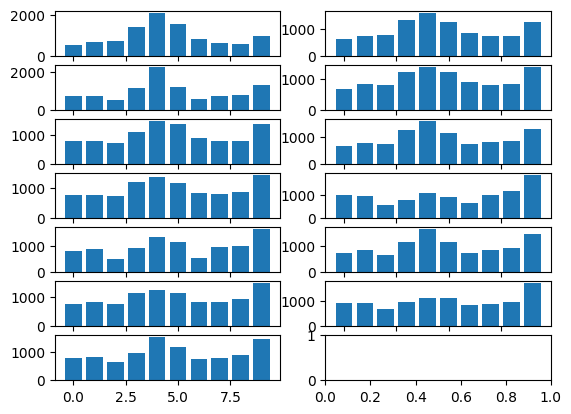

In [113]:
hist1 = means.filter(like='hist_R1_P8_u')
fig, axs = plt.subplots(7, 2)
for i in range(13):
    axs.flat[i].bar(range(8+2), hist1.iloc[i])


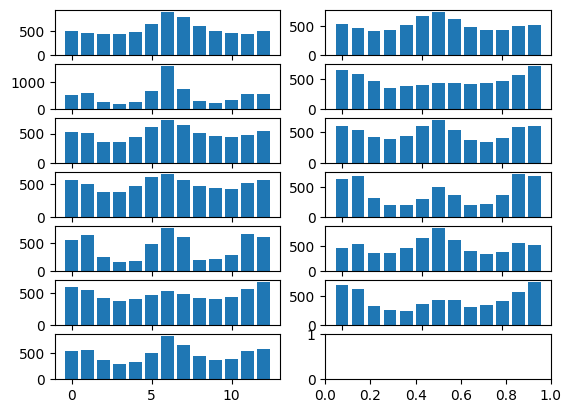

In [117]:
hist1 = means.filter(like='hist_R2_P12_u')
fig, axs = plt.subplots(7, 2)
for i in range(13):
    axs.flat[i].bar(range(12+1), hist1.iloc[i][:-1])


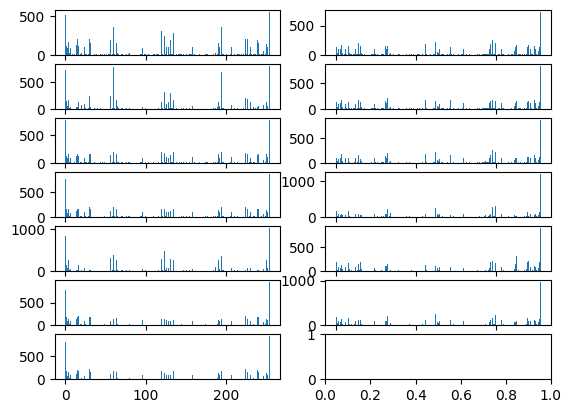

In [118]:
hist1 = means.filter(like='hist_R1_P8_d')
fig, axs = plt.subplots(7, 2)
for i in range(13):
    axs.flat[i].bar(range(256), hist1.iloc[i])


<BarContainer object of 256 artists>

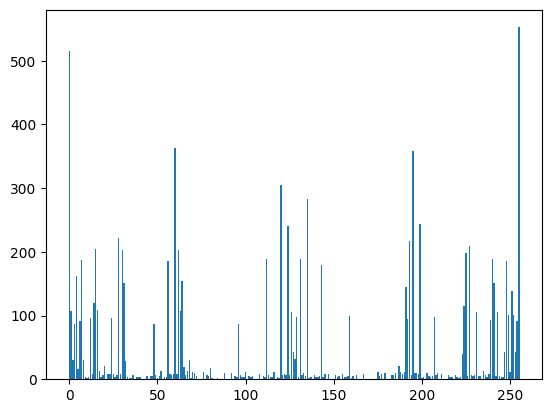

In [119]:
plt.bar(range(256), hist1.iloc[0])

<BarContainer object of 256 artists>

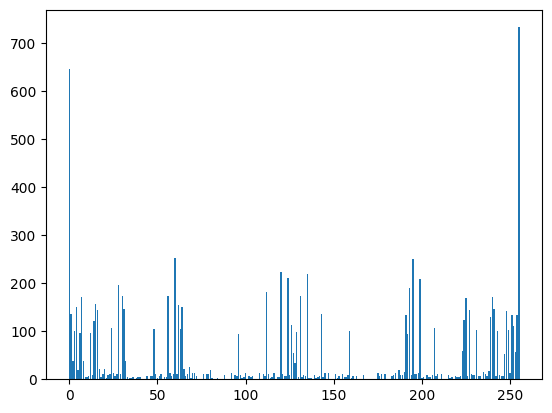

In [120]:
plt.bar(range(256), hist1.iloc[1])

# 3. Normality

In [128]:
means.loc[1]

hist_R1_P8_d[0]       515.986667
hist_R1_P8_d[1]       107.120000
hist_R1_P8_d[2]        29.600000
hist_R1_P8_d[3]        86.346667
hist_R1_P8_d[4]       162.293333
                        ...     
hist_R5_P36_u[33]     162.533333
hist_R5_P36_u[34]     182.786667
hist_R5_P36_u[35]     185.240000
hist_R5_P36_u[36]     643.626667
hist_R5_P36_u[37]    5786.906667
Name: 1, Length: 4440, dtype: float64

In [142]:
data = df_train.drop(columns=['label', 'label_subset']).astype(np.float64)

for l in df_train['label'].unique():
    data[delta['label'] == l] = data[delta['label'] == l] - means.loc[l]

In [143]:
df_train

,hist_R1_P8_d[0],hist_R1_P8_d[1],hist_R1_P8_d[2],hist_R1_P8_d[3],hist_R1_P8_d[4],hist_R1_P8_d[5],hist_R1_P8_d[6],hist_R1_P8_d[7],hist_R1_P8_d[8],hist_R1_P8_d[9],...,hist_R5_P36_u[30],hist_R5_P36_u[31],hist_R5_P36_u[32],hist_R5_P36_u[33],hist_R5_P36_u[34],hist_R5_P36_u[35],hist_R5_P36_u[36],hist_R5_P36_u[37],label,label_subset
1257,830,156,42,64,167,25,72,108,54,8,...,95,116,117,152,163,167,548,5964,7,3
1428,1109,191,57,84,153,36,62,75,84,13,...,36,72,53,96,144,228,401,6276,8,3
471,743,91,21,88,339,17,86,124,21,2,...,56,71,108,156,218,289,699,6796,6,2
1854,898,158,52,66,133,29,79,157,64,12,...,48,41,63,77,124,226,467,6122,13,3
1201,618,103,42,99,138,22,104,236,50,4,...,36,65,83,112,125,240,430,5869,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,969,121,51,75,247,39,88,132,53,6,...,42,61,64,108,159,256,585,7124,5,1
1239,622,114,39,99,120,25,86,218,40,8,...,55,76,76,102,180,262,509,6027,6,3
277,1079,164,43,83,314,40,66,101,24,8,...,14,13,16,68,152,280,508,7434,12,1
1238,674,89,54,106,137,18,99,221,39,5,...,34,47,75,96,150,252,487,6005,6,3


In [144]:
delta

,hist_R1_P8_d[0],hist_R1_P8_d[1],hist_R1_P8_d[2],hist_R1_P8_d[3],hist_R1_P8_d[4],hist_R1_P8_d[5],hist_R1_P8_d[6],hist_R1_P8_d[7],hist_R1_P8_d[8],hist_R1_P8_d[9],...,hist_R5_P36_u[30],hist_R5_P36_u[31],hist_R5_P36_u[32],hist_R5_P36_u[33],hist_R5_P36_u[34],hist_R5_P36_u[35],hist_R5_P36_u[36],hist_R5_P36_u[37],label,label_subset
1257,830,156,42,64,167,25,72,108,54,8,...,95,116,117,152,163,167,548,5964,7,3
1428,1109,191,57,84,153,36,62,75,84,13,...,36,72,53,96,144,228,401,6276,8,3
471,743,91,21,88,339,17,86,124,21,2,...,56,71,108,156,218,289,699,6796,6,2
1854,898,158,52,66,133,29,79,157,64,12,...,48,41,63,77,124,226,467,6122,13,3
1201,618,103,42,99,138,22,104,236,50,4,...,36,65,83,112,125,240,430,5869,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,969,121,51,75,247,39,88,132,53,6,...,42,61,64,108,159,256,585,7124,5,1
1239,622,114,39,99,120,25,86,218,40,8,...,55,76,76,102,180,262,509,6027,6,3
277,1079,164,43,83,314,40,66,101,24,8,...,14,13,16,68,152,280,508,7434,12,1
1238,674,89,54,106,137,18,99,221,39,5,...,34,47,75,96,150,252,487,6005,6,3
